In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

C:\Users\Lenovo\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
#scaling the data
X_train=X_train/255
X_test=X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

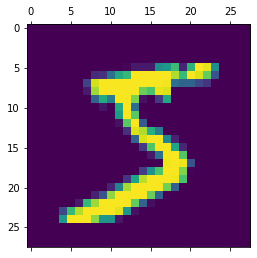

In [9]:
#shows first training image
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

### our training and testing data in 2-D form lets convert or flatten in 1-D array 

In [11]:
X_train_flattened=X_train.reshape(len(X_train), 28*28)
X_test_flattened=X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_test_flattened.shape

(10000, 784)

In [14]:
# build model
model=keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
                 ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4700 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3044 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2836 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2666 - accuracy: 0.9258


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2691 - accuracy: 0.9245


[0.26912549138069153, 0.9244999885559082]

In [16]:
y_pred=model.predict(X_test_flattened)

313/313 [==============================] - 2s 4ms/step


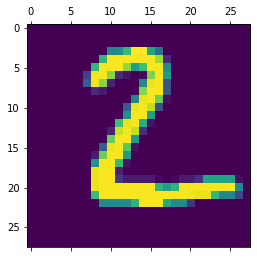

In [17]:
plt.matshow(X_test[1])

In [18]:
y_pred[1]

array([3.2600841e-01, 9.3814032e-03, 9.9936163e-01, 2.7860045e-01,
       9.5447172e-10, 8.3053803e-01, 8.9327419e-01, 9.5821506e-13,
       1.2914421e-01, 3.9534069e-09], dtype=float32)

In [19]:
#lets check our predictaion
np.argmax(y_pred[1])

2

In [20]:
# our prediction is correct

In [22]:
# again build model adding a one hidden layer
# build model
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
                 ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2785 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1277 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0895 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0685 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0538 - accuracy: 0.9840
